### Gaussian Mixture Models (GMMs)

In [1]:
import numpy as np
import scipy as sp
import scipy.io as io
import matplotlib.pyplot as plt

# PLT Style STIx
plt.rcParams["font.family"] = "STIxGeneral"

Initialization

In [2]:
data = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])

In [3]:
np.random.seed(0)
temp = np.random.permutation(len((data)))

# 201 as the number of iterations
piecap = np.zeros(201)  # piecap2 = 1 - piecap1, so we only need to store one
meucap1 = np.zeros(201)
meucap2 = np.zeros(201)
sigmacap1 = np.zeros(201)
sigmacap2 = np.zeros(201)
log_likelihood = np.zeros(201)
responsibilities = np.zeros((201, len(data)))

piecap[0] = 0.5
meucap1[0] = data[temp[0]]
meucap2[0] = data[temp[1]]
sigmacap1[0] = np.var(data)
sigmacap2[0] = np.var(data)

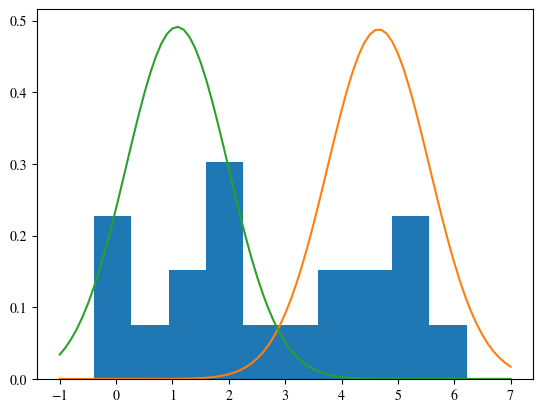

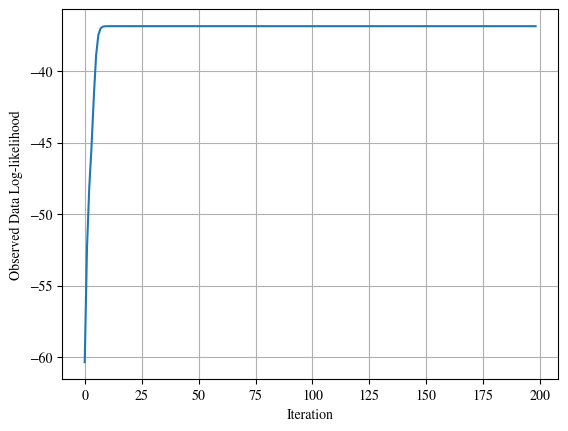

In [4]:
def gauss_dist(x, meu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - meu) ** 2) / (2 * sigma))


for i in range(200):
    Qq1 = gauss_dist(data, meucap1[i], sigmacap1[i])
    Qq2 = gauss_dist(data, meucap2[i], sigmacap2[i])

    log_likelihood[i] = np.sum(np.log(((1 - piecap[i]) * Qq1) + (piecap[i] * Qq2)))
    responsibilities[i, :] = (piecap[i] * Qq2) / (
        ((1 - piecap[i]) * Qq1) + (piecap[i] * Qq2)
    )
    
    meucap1[i + 1] = np.sum((1 - responsibilities[i, :]) * data) / np.sum(
        1 - responsibilities[i, :]
    )
    meucap2[i + 1] = np.sum(responsibilities[i, :] * data) / np.sum(
        responsibilities[i, :]
    )
    sigmacap1[i + 1] = np.sum(
        (1 - responsibilities[i, :]) * ((data - meucap1[i]) ** 2)
    ) / np.sum(1 - responsibilities[i, :])
    sigmacap2[i + 1] = np.sum(
        responsibilities[i, :] * ((data - meucap2[i]) ** 2)
    ) / np.sum(responsibilities[i, :])
    piecap[i + 1] = np.sum(responsibilities[i, :]) / len(data)
    
x = np.arange(-1, 7.1, 0.1)
norm1 = gauss_dist(x, meucap1[-1], sigmacap1[-1]) 
norm2 = gauss_dist(x, meucap2[-1], sigmacap2[-1]) 
plt.figure()
plt.hist(data, bins=10, density=True)
plt.plot(x, norm1)
plt.plot(x, norm2)
plt.show()
plt.figure()
plt.plot(log_likelihood[:199])
plt.xlabel('Iteration')
plt.ylabel('Observed Data Log-likelihood')
plt.grid()
plt.show()